In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

**Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable**

In [2]:
data1 = pd.read_csv("/workspaces/GreatLearning/Unsupervised/Project/Car name.csv")

In [3]:
data1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
data1.shape

(398, 1)

**Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.**

In [5]:
data2 = pd.read_json("/workspaces/GreatLearning/Unsupervised/Project/Car-Attributes.json")

In [6]:
data2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
data2.shape

(398, 8)

**Part 1.1 c - Merge both the DataFrames together to form a single DataFrame**

In [8]:
data = pd.merge(data1, data2, left_index=True, right_index=True)


In [9]:
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
data.shape

(398, 9)

**Part 1.1 d - Print 5 point summary of the numerical features and share insights.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Insights from 5 points summary**

Totally we have 7 numerical columns , lets see one by one

**1.mpg**

total records = 398,

min value = 9,

mean value = 23,

sd value = 7.8,

max value = 46.6,

25 th percentile = 17.5,

50 th percentile = 23,

75 th percentile = 29

**2.cyl**

total records = 398,

min value = 3,

mean value = 5.4,

sd value = 1.7,

max value = 8,

25 th percentile = 4,

50 th percentile = 4,

75 th percentile = 8

**3.disp**

total records = 398,

min value = 68,

mean value = 193,

sd value = 104,

max value = 455,

25 th percentile = 104,

50 th percentile = 148,

75 th percentile = 262
 
**4.wt**

total records = 398,

min value = 1613,

mean value = 2970,

sd value = 846,

max value = 5140,

25 th percentile = 2223,

50 th percentile = 2803,

75 th percentile = 3608

**5.acc**

total records = 398,

min value = 8,

mean value = 15,

sd value = 2,

max value = 24,

25 th percentile = 13,

50 th percentile = 15,

75 th percentile = 17

**6.yr**

total records = 398,

min value = 70,

mean value = 76,

sd value = 3,

max value = 82,

25 th percentile = 73,

50 th percentile = 76,

75 th percentile = 79


**7.origin**

total records = 398,

min value = 1,

mean value = 1.5,

sd value = 0.8,

max value = 3,

25 th percentile = 1,

50 th percentile = 1,

75 th percentile = 2

**Part 1.2 a - Check and print feature-wise percentage of
missing values present in the data and impute with the
best suitable approach.**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Column with wrong data types(compared with data description)**
1. hp - object here - need to be changes to float



In [14]:
data["hp"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [15]:
data["hp"] = data["hp"].replace("?", pd.NaT)                                              

In [16]:
data["hp"] = pd.to_numeric(data["hp"], errors='coerce')

In [17]:
data["hp"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [18]:
print("NULL %")
data.isnull().sum()/len(data)

NULL %


car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          0.015075
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [19]:
data["hp"].fillna(data["hp"].mean(), inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Part 1.2 b - Check for duplicate values in the data and
impute with the best suitable approach.**

In [21]:
data.duplicated().sum()

0

**I don't see any duplicate records in data**

**Part 1.2 c - Plot a pairplot for all features.**

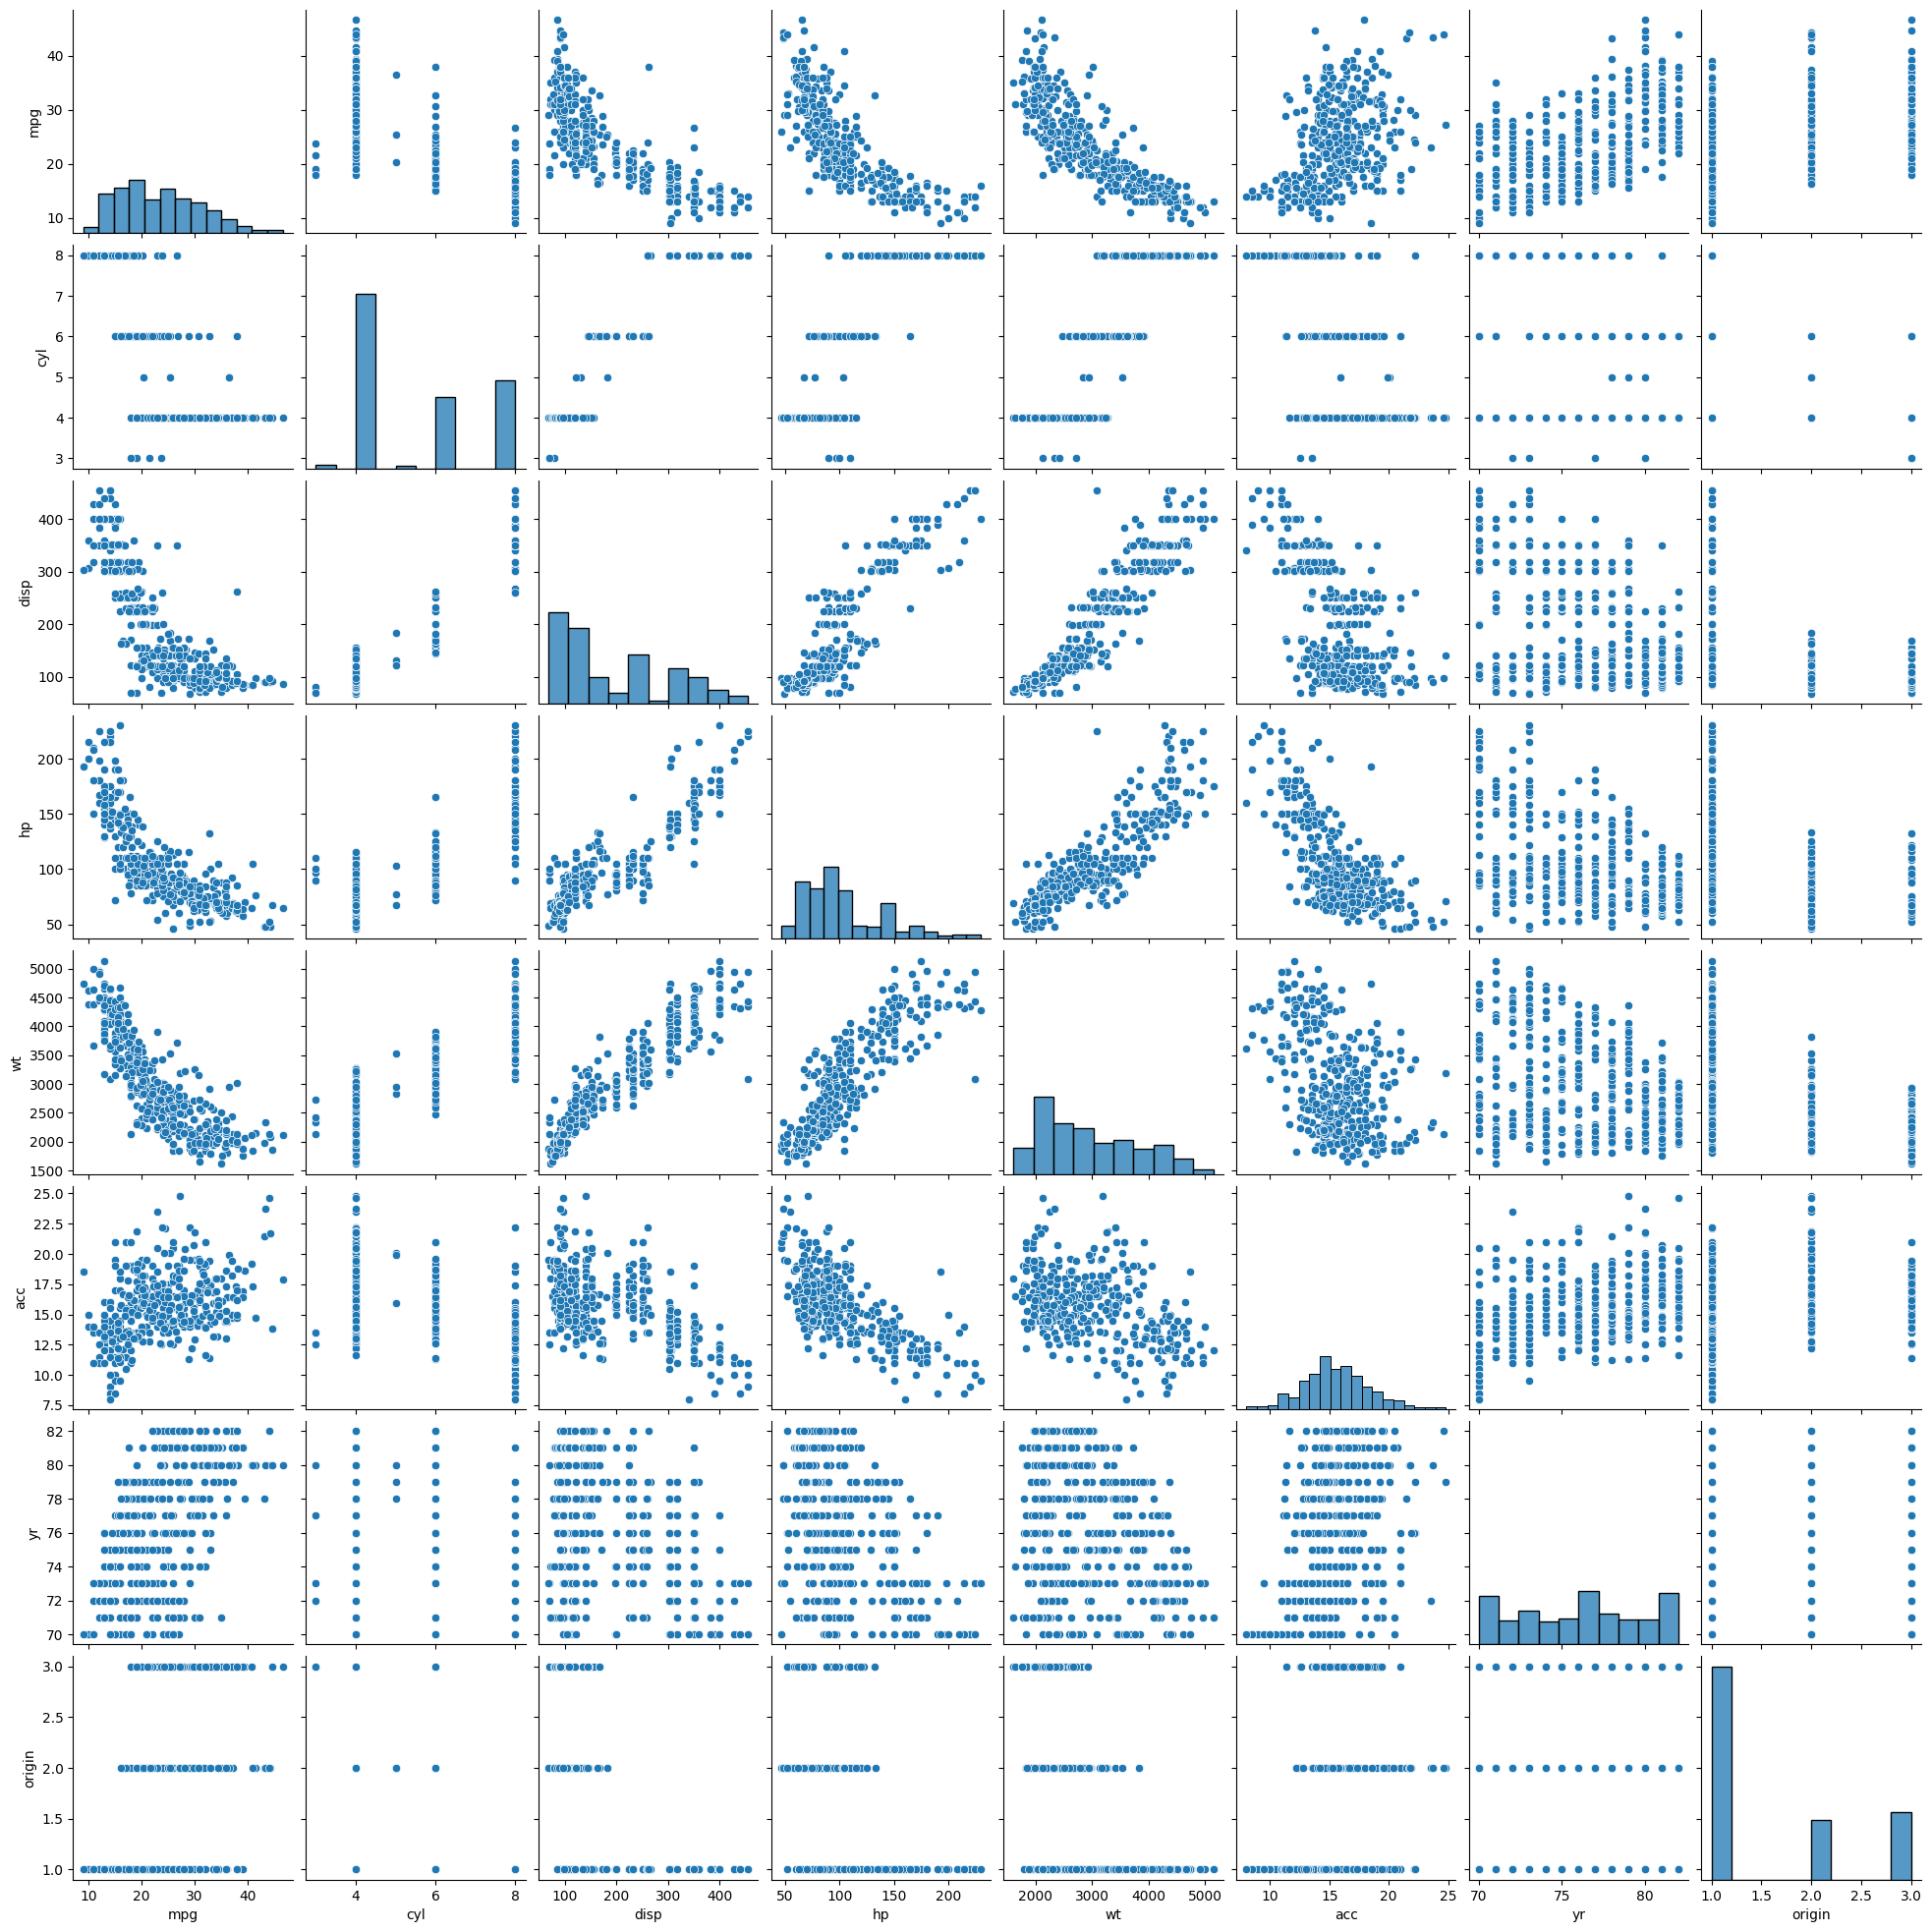

In [22]:
sns.pairplot(data)

**Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’.
Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='disp'>

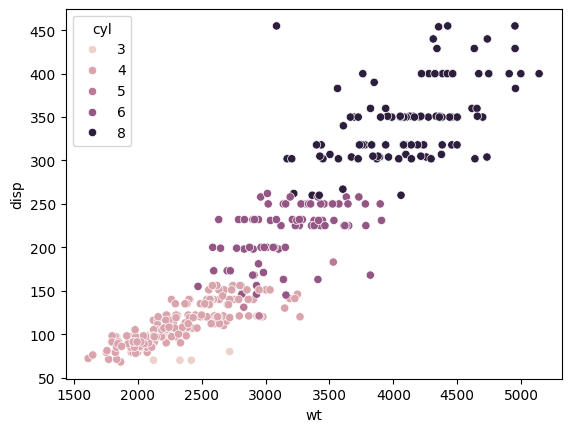

In [34]:
sns.scatterplot(data=data, x='wt', y='disp', hue='cyl')

**Part 1.2 e - Share insights for Q2.d.**

While comparing wt and disp feature
- both are seems to be postively correlated , when weight increases , displacement also increases and vice versa

While comparing wt and disp feature and distinguish by cylinders
- all three are postively correlated, when cylinders increases both weight and displacement also increased and vice versa



**Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’.
Datapoints should be distinguishable by ‘cyl’**

<Axes: xlabel='wt', ylabel='mpg'>

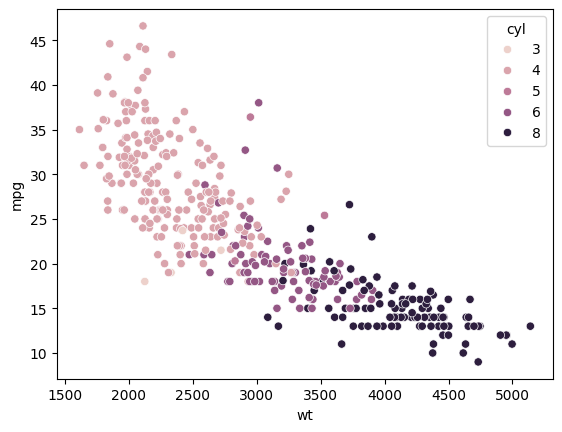

In [33]:
sns.scatterplot(data=data, x='wt', y='mpg', hue='cyl')

**Part 1.2 g- Share insights for Q2.f.**

While comparing wt and mpg feature
- both are seems to be negatively correlated , when weight increases , miles per gallon also decreases and vice versa

While comparing wt and mpg feature and distinguish by cylinders
- all three are negatively correlated, when cylinders increases both weight and miles per gallon also decreases and vice versa